In [1]:
!pip install opencv-python -q

import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

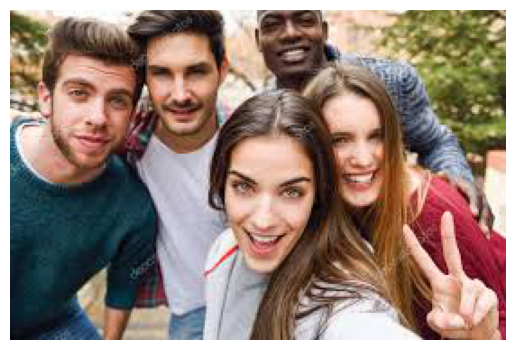

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images (1).jfif")
plt.imshow(img)
plt.axis("off")


In [7]:
image_path = "images (1).jfif"   # <-- CHANGE THIS

img = cv2.imread(image_path)

if img is None:
    print("❌ Image not found. Check file name.")
else:
    print("✅ Image loaded successfully")


✅ Image loaded successfully


In [8]:
import cv2
import urllib.request

# Download Haar cascade files
url_face = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
url_eye = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml"

urllib.request.urlretrieve(url_face, "haarcascade_frontalface_default.xml")
urllib.request.urlretrieve(url_eye, "haarcascade_eye.xml")

# Load cascades
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

print("✅ Haar Cascades Loaded")


✅ Haar Cascades Loaded


Faces detected: 4
Eyes detected: 0


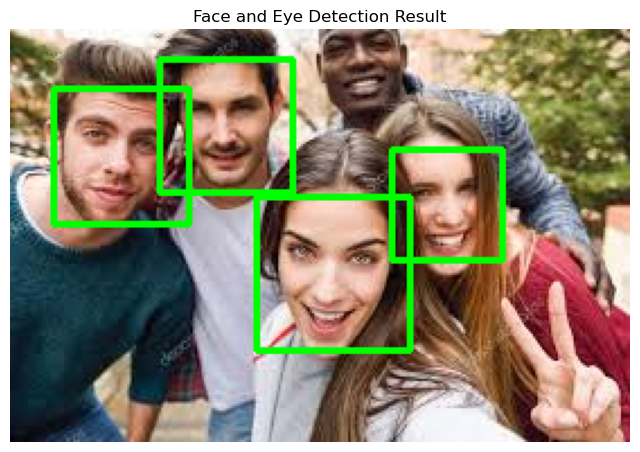

In [9]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

eyes_total = 0

for (x, y, w, h) in faces:
    # Draw rectangle around face
    cv2.rectangle(rgb, (x, y), (x+w, y+h), (0,255,0), 2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = rgb[y:y+h, x:x+w]

    # Detect eyes inside face
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    eyes_total += len(eyes)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(
            roi_color,
            (ex, ey),
            (ex+ew, ey+eh),
            (255, 0, 0),
            2
        )

print("Faces detected:", len(faces))
print("Eyes detected:", eyes_total)

# Display result
plt.figure(figsize=(8,6))
plt.imshow(rgb)
plt.axis("off")
plt.title("Face and Eye Detection Result")
plt.show()
